In [15]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt

In [40]:
def getkArr(L, bins, override=False):
    kArr = np.zeros((bins, bins, bins), dtype=float)
    halfBins = 0
    for i in range(bins):
        for j in range(bins):
            for k in range(bins):
                lx = - (4 * bins**2 / L**2) * np.sin((np.pi / bins) * (i - halfBins))**2
                ly = - (4 * bins**2 / L**2) * np.sin((np.pi / bins) * (j - halfBins))**2
                lz = - (4 * bins**2 / L**2) * np.sin((np.pi / bins) * (k - halfBins))**2
                if i == halfBins and j == halfBins and k == halfBins:
                    kArr[i, j, k] = 1
                else:
                    kArr[i, j, k] = lx + ly + lz
    
    return kArr

size = 10
bins = size
kArr = getkArr(size, bins)
a = np.asarray([1, 2, 3])

testA = np.asarray([[[-np.dot(a, a) * np.cos(np.dot(a, np.asarray([i, j, k]))) for i in range(size)] for j in range(size)] for k in range(size)])
testAfft = fft.ifft(testA)
testB = fft.fft(testA / kArr).real

(array([553., 301.,  73.,  30.,   9.,  10.,   5.,   4.,   8.,   7.]),
 array([6.96005660e-04, 4.30389216e+00, 8.60708831e+00, 1.29102845e+01,
        1.72134806e+01, 2.15166768e+01, 2.58198729e+01, 3.01230691e+01,
        3.44262652e+01, 3.87294614e+01, 4.30326575e+01]),
 <BarContainer object of 10 artists>)

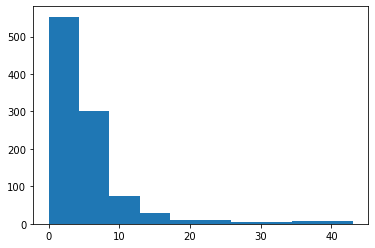

In [41]:
testC = np.asarray([[[np.cos(np.dot(a, np.asarray([i, j, k]))) for i in range(size)] for j in range(size)] for k in range(size)])
testDiff = np.asarray([np.abs(testC[i, j, k] - testB[i, j, k]) for i in range(size) for j in range(size) for k in range(size)])
plt.hist(testDiff)

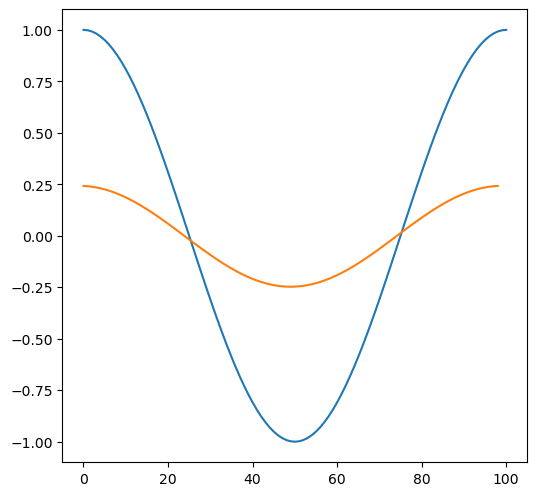

In [42]:
s = 100
# kArr = np.asarray([- 4 * np.sin((np.pi / s) * (i - int(s / 2)))**2 for i in range(s + 1)])
kArr = np.asarray([- (2 * np.pi * (i) / s)**2 for i in range(s + 1)])
kArr[0] = 1
rho = np.asarray([np.cos(2 * np.pi * (i - s) / s) for i in range(s + 1)])

rhoFFT = fft.ifft(rho)
phi = fft.fft(rhoFFT / kArr).real
phiDD = np.asarray([(phi[i + 1] - 2*phi[i] + phi[i - 1]) / 2 for i in range(1, s)])

fig = plt.subplots(figsize=(6, 6), dpi=100)
plt.plot(range(s + 1), rho)
plt.plot(range(s - 1), phiDD)